<a class="anchor" id="0.0"></a>
# Dataset [Air Quality Monitoring](https://www.kaggle.com/vbmokin/air-quality-monitoring)

Dataset contains data of air quality monitoring in Vinnytsia city for 5 monitoring stations.

Data for 2019-2021 with an interval of 15-145 seconds.

### Possible Tasks:

Analyze the basic patterns of data change in the city as a whole and for each station separately (seasonality, anomalies, etc.).

### Map of the stations:
https://www.saveecobot.com/en/maps#12/49.2296/28.4755/aqi/comp+cams+fire

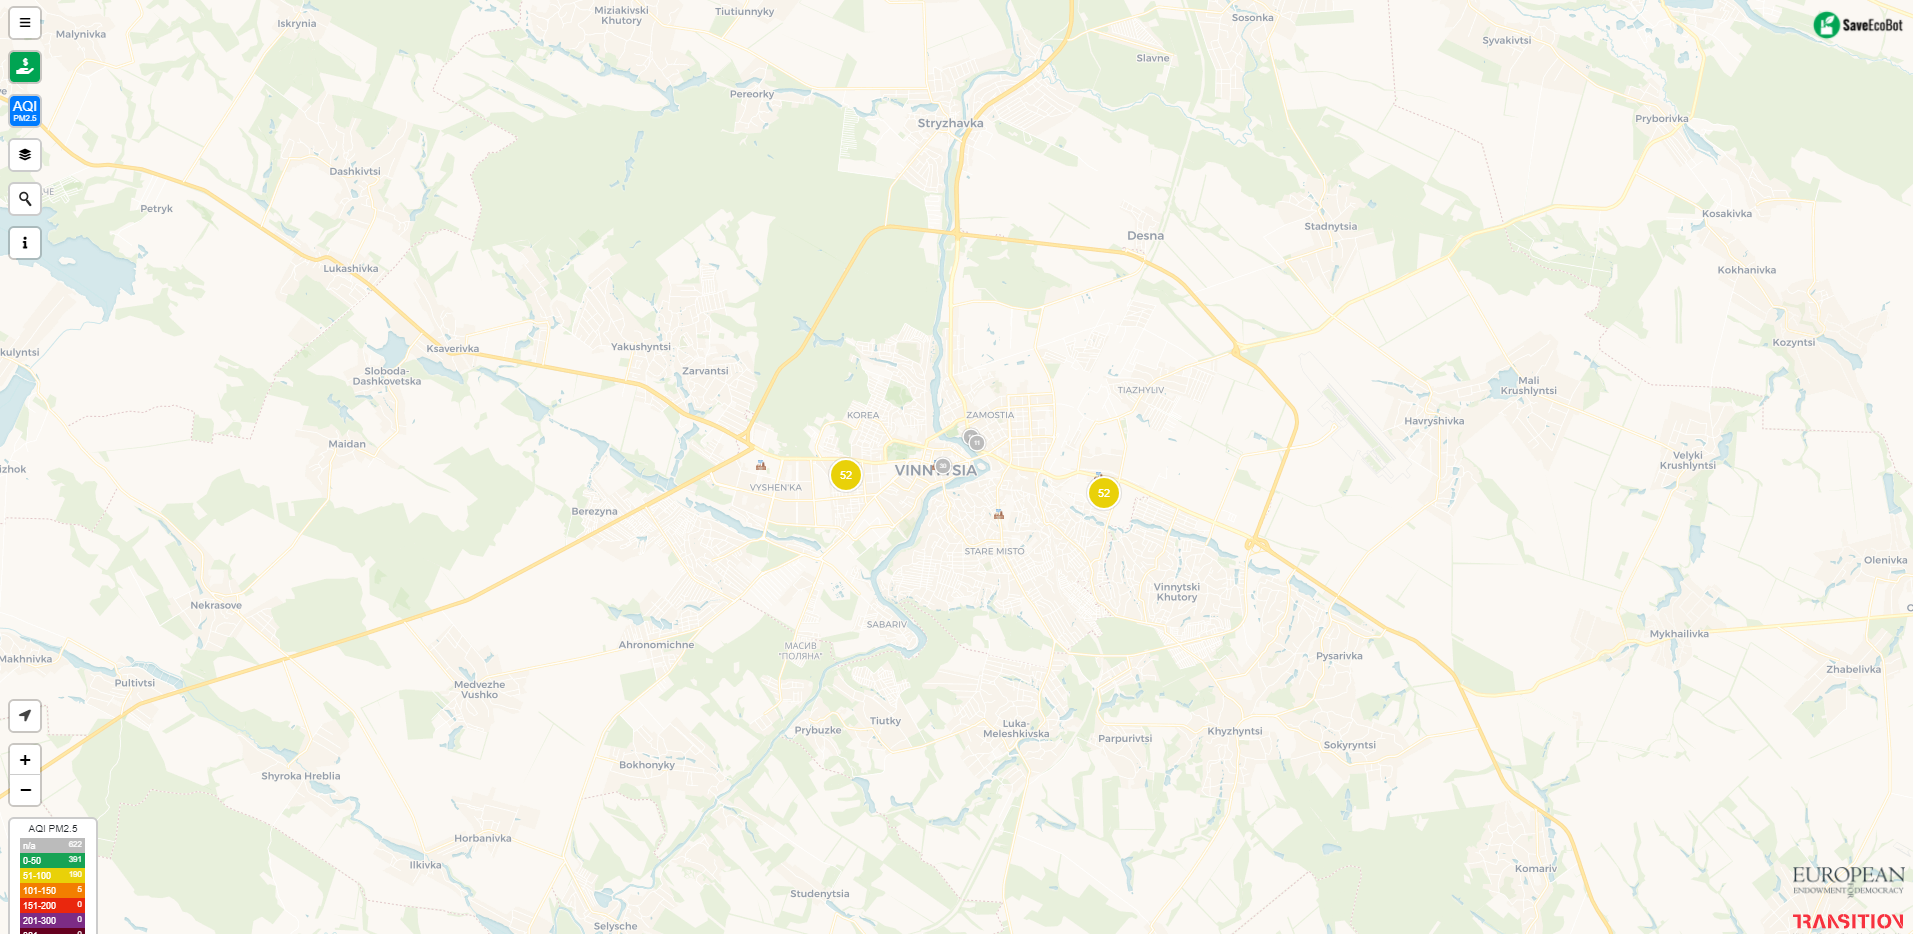

Air Quality Monitoring in Vinnytsia city.

## Acknowledgements
* [Data Science for tabular data: Advanced Techniques](https://www.kaggle.com/vbmokin/data-science-for-tabular-data-advanced-techniques)
* [EDA for tabular data: Advanced Techniques](https://www.kaggle.com/vbmokin/eda-for-tabular-data-advanced-techniques)
* services:
    * ["SaveEcoBot"](https://www.saveecobot.com/) 
    * ["Eco-City"](https://eco-city.org.ua/)
    * ["Luftdaten.info"](https://luftdaten.info/)
    * ["SaveDnipro"](https://www.savednipro.org/) 

<a class="anchor" id="0.1"></a>
## Table of Contents

1. [Import libraries](#1)
1. [Download data](#2)
1. [EDA](#3)

## 1. Import libraries<a class="anchor" id="1"></a>

[Back to Table of Contents](#0.1)

In [ ]:
# Work with Data - the main Python libraries
import numpy as np
import pandas as pd
import os
import pandas_profiling as pp

# Visualization
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import warnings
warnings.simplefilter('ignore')

## 2. Download data<a class="anchor" id="2"></a>

[Back to Table of Contents](#0.1)

In [ ]:
# Creation the list of files with data
file_list = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        file_list.append(os.path.join(dirname, filename))
file_list

In [ ]:
def AQMV_download(file_path):
    # Download and visualization data for given station # num_station from file with file_path
    
    # Determination the number of station
    num_station = int(file_path[(file_path.rfind("_")+1):file_path.rfind(".")])
    
    # Filtering of defective data
    if num_station==4152:
        skiprows_value = 560663
    elif num_station==14627:
        skiprows_value = 525902
    elif num_station==4152:
        skiprows_value = 560663
    elif num_station==15952:
        skiprows_value = 457572
    else: skiprows_value=None
    
    # Download data
    if skiprows_value is None:
        df = pd.read_csv(file_path, sep=',', header=0)
    else: 
        df = pd.read_csv(file_path, sep=',', header=None, skiprows=skiprows_value)
    df.columns = ['device_id', 'phenomenon', 'value', 'time', 'value_text']
    
    indicators_list = df['phenomenon'].dropna().unique().tolist()
    df = df[['phenomenon', 'value', 'time']]
    df = pd.pivot_table(df, values=['value'], index=['time'], columns=['phenomenon'])
    df.columns = indicators_list
    
    # Draw plots
    print(f"Data of the station number {num_station}")
    for col in indicators_list:
        plt.figure(figsize=(12, 3))
        plt.title(f'Indicator - "{col}"')
        df[col].plot(rot=45)
    plt.show()
    
    return df, num_station

In [ ]:
# Download and visualization data for given file path (station)
df, num_station = AQMV_download(file_list[1])
df

## 3. EDA<a class="anchor" id="3"></a>

[Back to Table of Contents](#0.1)

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
# EDA with Pandas Profiling
pp.ProfileReport(df)

I invite others to improve this notebook.

[Go to Top](#0)